In [ ]:
#Capstone project note book for data cleaning and ML

In [3]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
### loading original file .. NAN issues showed up ###
#azdias_cat_df = pd.read_csv("Udacity_AZDIAS_052018.csv", sep=';', usecols=["CAMEO_DEU_2015", "CAMEO_DEUG_2015", "CAMEO_INTL_2015", "D19_LETZTER_KAUF_BRANCHE","EINGEFUEGT_AM","OST_WEST_KZ"])
#azdias_df = pd.read_csv("Udacity_AZDIAS_052018.csv", sep=';')

In [3]:
import boto3

# s3 = boto3.resource('s3')
# with open('azdias.pkl', 'wb') as data:
#     s3.Bucket("sagemaker-us-east-2-840691022453").download_fileobj("azdias_scaled.p", data)

# with open('azdias.pkl', 'rb') as data:
#     azdias_df = pickle.load(data)

s3 = boto3.client('s3')
obj = s3.get_object(Bucket='sagemaker-us-east-2-840691022453', Key='Udacity_AZDIAS_052018_scaled.csv')
azdias_df = pd.read_csv(obj['Body'])

In [4]:
azdias_df.shape

(891221, 296)

In [6]:
azdias_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'ANZ_HAUSHALTE_AKTIV',
       'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL', 'BALLRAUM',
       'CJT_GESAMTTYP', 'EWDICHTE',
       ...
       'CAMEO_DEU_2015_7E', 'CAMEO_DEU_2015_8A', 'CAMEO_DEU_2015_8B',
       'CAMEO_DEU_2015_8C', 'CAMEO_DEU_2015_8D', 'CAMEO_DEU_2015_9A',
       'CAMEO_DEU_2015_9B', 'CAMEO_DEU_2015_9C', 'CAMEO_DEU_2015_9D',
       'CAMEO_DEU_2015_9E'],
      dtype='object', length=296)

In [7]:
# dropping the 1st three columns that are just indices
azdias_df = azdias_df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1)

In [9]:
azdias_df.columns

Index(['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'BALLRAUM', 'CJT_GESAMTTYP', 'EWDICHTE', 'FINANZ_ANLEGER',
       'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST',
       ...
       'CAMEO_DEU_2015_7E', 'CAMEO_DEU_2015_8A', 'CAMEO_DEU_2015_8B',
       'CAMEO_DEU_2015_8C', 'CAMEO_DEU_2015_8D', 'CAMEO_DEU_2015_9A',
       'CAMEO_DEU_2015_9B', 'CAMEO_DEU_2015_9C', 'CAMEO_DEU_2015_9D',
       'CAMEO_DEU_2015_9E'],
      dtype='object', length=293)

In [11]:
all_corrs = {}
df_cols = azdias_df.columns

# for i in range(azdias_df.shape[1]-1):
#     for j in range(i+1, azdias_df.shape[1]):
#         all_corrs[str(i)+'-'+str(j)] = np.corrcoef(azdias_df[:,i], azdias_df[:,j])[0][1]
        
for i in range(len(df_cols)-1):
    for j in range(i+1, len(df_cols)):
        all_corrs[df_cols[i]+'-'+df_cols[j]] = np.corrcoef(azdias_df[df_cols[i]], azdias_df[df_cols[j]])[0][1]
    

In [13]:
#all_corrs

In [14]:
pickle.dump(all_corrs, open('data/all_corrs.p', 'wb'))

In [6]:
#all_corrs = pickle.load(open('all_corrs.p', 'rb'))

In [15]:
"""
Lets flag correlations that are above 0.8
"""
to_remove = {}
for k in all_corrs.keys():
    if np.abs(all_corrs[k]) >= 0.8:
        idx = k.split('-')
        if idx[0] not in to_remove:
            to_remove[idx[0]] = [idx[1]]
        else:
            to_remove[idx[0]].append(idx[1])

In [16]:
"""
Identifying exact columns to delete
"""
keys_to_del = []
for i in to_remove:
    for j in to_remove[i]:
        if j not in keys_to_del:
            keys_to_del.append(j)
print(keys_to_del)
print(len(keys_to_del))

['FINANZ_VORSORGER', 'PRAEGENDE_JUGENDJAHRE', 'MOBI_REGIO', 'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_SEG2', 'KBA05_ZUL4', 'KBA05_SEG9', 'KBA13_HALTER_30', 'KBA13_HALTER_40', 'KBA13_HALTER_55', 'KBA13_HALTER_66', 'KBA13_HERST_SONST', 'KBA13_VW', 'KBA13_MERCEDES', 'KBA13_KMH_250', 'KBA13_SEG_VAN', 'KBA13_SEG_KLEINWAGEN', 'KBA13_SITZE_5', 'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_STATUS_GROB', 'ANREDE_KZ']
25


In [17]:
"""
Drop columns that are highly correlated to the other columns
"""
#selected_feature = np.delete(azdias_df, keys_to_del, axis=1)
selected_feature = azdias_df.drop(keys_to_del, axis=1)

In [19]:
selected_feature.columns

Index(['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'BALLRAUM', 'CJT_GESAMTTYP', 'EWDICHTE', 'FINANZ_ANLEGER',
       'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST',
       ...
       'CAMEO_DEU_2015_7E', 'CAMEO_DEU_2015_8A', 'CAMEO_DEU_2015_8B',
       'CAMEO_DEU_2015_8C', 'CAMEO_DEU_2015_8D', 'CAMEO_DEU_2015_9A',
       'CAMEO_DEU_2015_9B', 'CAMEO_DEU_2015_9C', 'CAMEO_DEU_2015_9D',
       'CAMEO_DEU_2015_9E'],
      dtype='object', length=268)

In [18]:
print("shape after dropping columns",selected_feature.shape)

shape after dropping columns (891221, 268)


In [21]:
#pickle.dump(selected_feature, open("selected_feature.p", "wb"))
selected_feature.to_csv('data/azdias_df_selected.csv')

In [10]:
#Lets load the dataframe if required
selected_feature = pd.read_csv('data/azdias_df_selected.csv')

In [129]:
selected_feature = selected_feature.drop('Unnamed: 0', axis=1)

In [130]:
selected_feature.columns

Index(['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'BALLRAUM', 'CJT_GESAMTTYP', 'EWDICHTE', 'FINANZ_ANLEGER',
       'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST',
       ...
       'CAMEO_DEU_2015_7E', 'CAMEO_DEU_2015_8A', 'CAMEO_DEU_2015_8B',
       'CAMEO_DEU_2015_8C', 'CAMEO_DEU_2015_8D', 'CAMEO_DEU_2015_9A',
       'CAMEO_DEU_2015_9B', 'CAMEO_DEU_2015_9C', 'CAMEO_DEU_2015_9D',
       'CAMEO_DEU_2015_9E'],
      dtype='object', length=268)

In [125]:
# Lets run kmeans on the selected features 
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=1,
                          batch_size=20000)
kmeans_cluster1 = kmeans.partial_fit(selected_feature)

In [10]:
kmeans = MiniBatchKMeans(n_clusters=2,
                          batch_size=20000)
kmeans_cluster2 = kmeans.partial_fit(selected_feature)

In [11]:
kmeans = MiniBatchKMeans(n_clusters=4,
                          batch_size=20000)
kmeans_cluster4 = kmeans.partial_fit(selected_feature)

In [12]:
kmeans = MiniBatchKMeans(n_clusters=5,
                          batch_size=20000)
kmeans_cluster5 = kmeans.partial_fit(selected_feature)

In [13]:
kmeans = MiniBatchKMeans(n_clusters=10,
                          batch_size=20000)
kmeans_cluster10 = kmeans.partial_fit(selected_feature)

In [14]:
kmeans = MiniBatchKMeans(n_clusters=15,
                          batch_size=20000)
kmeans_cluster15 = kmeans.partial_fit(selected_feature)

In [131]:
kmeans = MiniBatchKMeans(n_clusters=20,
                          batch_size=20000)
kmeans_cluster20 = kmeans.partial_fit(selected_feature)

In [16]:
kmeans = MiniBatchKMeans(n_clusters=25,
                          batch_size=20000)
kmeans_cluster25 = kmeans.partial_fit(selected_feature)

In [17]:
kmeans = MiniBatchKMeans(n_clusters=30,
                          batch_size=20000)
kmeans_cluster30 = kmeans.partial_fit(selected_feature)

In [18]:
kmeans = MiniBatchKMeans(n_clusters=35,
                          batch_size=20000)
kmeans_cluster35 = kmeans.partial_fit(selected_feature)

In [19]:
kmeans = MiniBatchKMeans(n_clusters=40,
                          batch_size=20000)
kmeans_cluster40 = kmeans.partial_fit(selected_feature)

In [20]:
kmeans = MiniBatchKMeans(n_clusters=45,
                          batch_size=20000)
kmeans_cluster45 = kmeans.partial_fit(selected_feature)

In [21]:
kmeans = MiniBatchKMeans(n_clusters=50,
                          batch_size=20000)
kmeans_cluster50 = kmeans.partial_fit(selected_feature)

In [22]:
kmeans = MiniBatchKMeans(n_clusters=55,
                          batch_size=20000)
kmeans_cluster55 = kmeans.partial_fit(selected_feature)

In [23]:
kmeans = MiniBatchKMeans(n_clusters=60,
                          batch_size=20000)
kmeans_cluster60 = kmeans.partial_fit(selected_feature)

In [30]:
kmeans = MiniBatchKMeans(n_clusters=65,
                          batch_size=20000)
kmeans_cluster65 = kmeans.partial_fit(selected_feature)

In [25]:
kmeans = MiniBatchKMeans(n_clusters=70,
                          batch_size=20000)
kmeans_cluster70 = kmeans.partial_fit(selected_feature)

In [26]:
kmeans = MiniBatchKMeans(n_clusters=80,
                          batch_size=20000)
kmeans_cluster80 = kmeans.partial_fit(selected_feature)

In [27]:
kmeans = MiniBatchKMeans(n_clusters=90,
                          batch_size=20000)
kmeans_cluster90 = kmeans.partial_fit(selected_feature)

In [29]:
kmeans = MiniBatchKMeans(n_clusters=100,
                          batch_size=20000)
kmeans_cluster100 = kmeans.partial_fit(selected_feature)

In [31]:
# Lets predict closest cluster center for azdias df
models = [kmeans_cluster1, kmeans_cluster2, kmeans_cluster4, kmeans_cluster5, kmeans_cluster10, kmeans_cluster15, kmeans_cluster20, 
          kmeans_cluster25, kmeans_cluster30, kmeans_cluster35, kmeans_cluster40, kmeans_cluster45, kmeans_cluster50,
         kmeans_cluster55, kmeans_cluster60, kmeans_cluster65, kmeans_cluster70, kmeans_cluster80,
         kmeans_cluster90, kmeans_cluster100]

In [32]:
predictions = []
for model in models:
    predictions.append(model.predict(selected_feature))

In [33]:
sse = []
for model in models:
    sse.append(model.inertia_)

In [107]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 300
# from matplotlib import pyplot as plt
# k = [i for i in range(5,55,5)]
# plt.plot(k, sse, '--o')
# plt.xlabel("k clusters")
# plt.ylabel("sse")

Text(0, 0.5, 'sse')

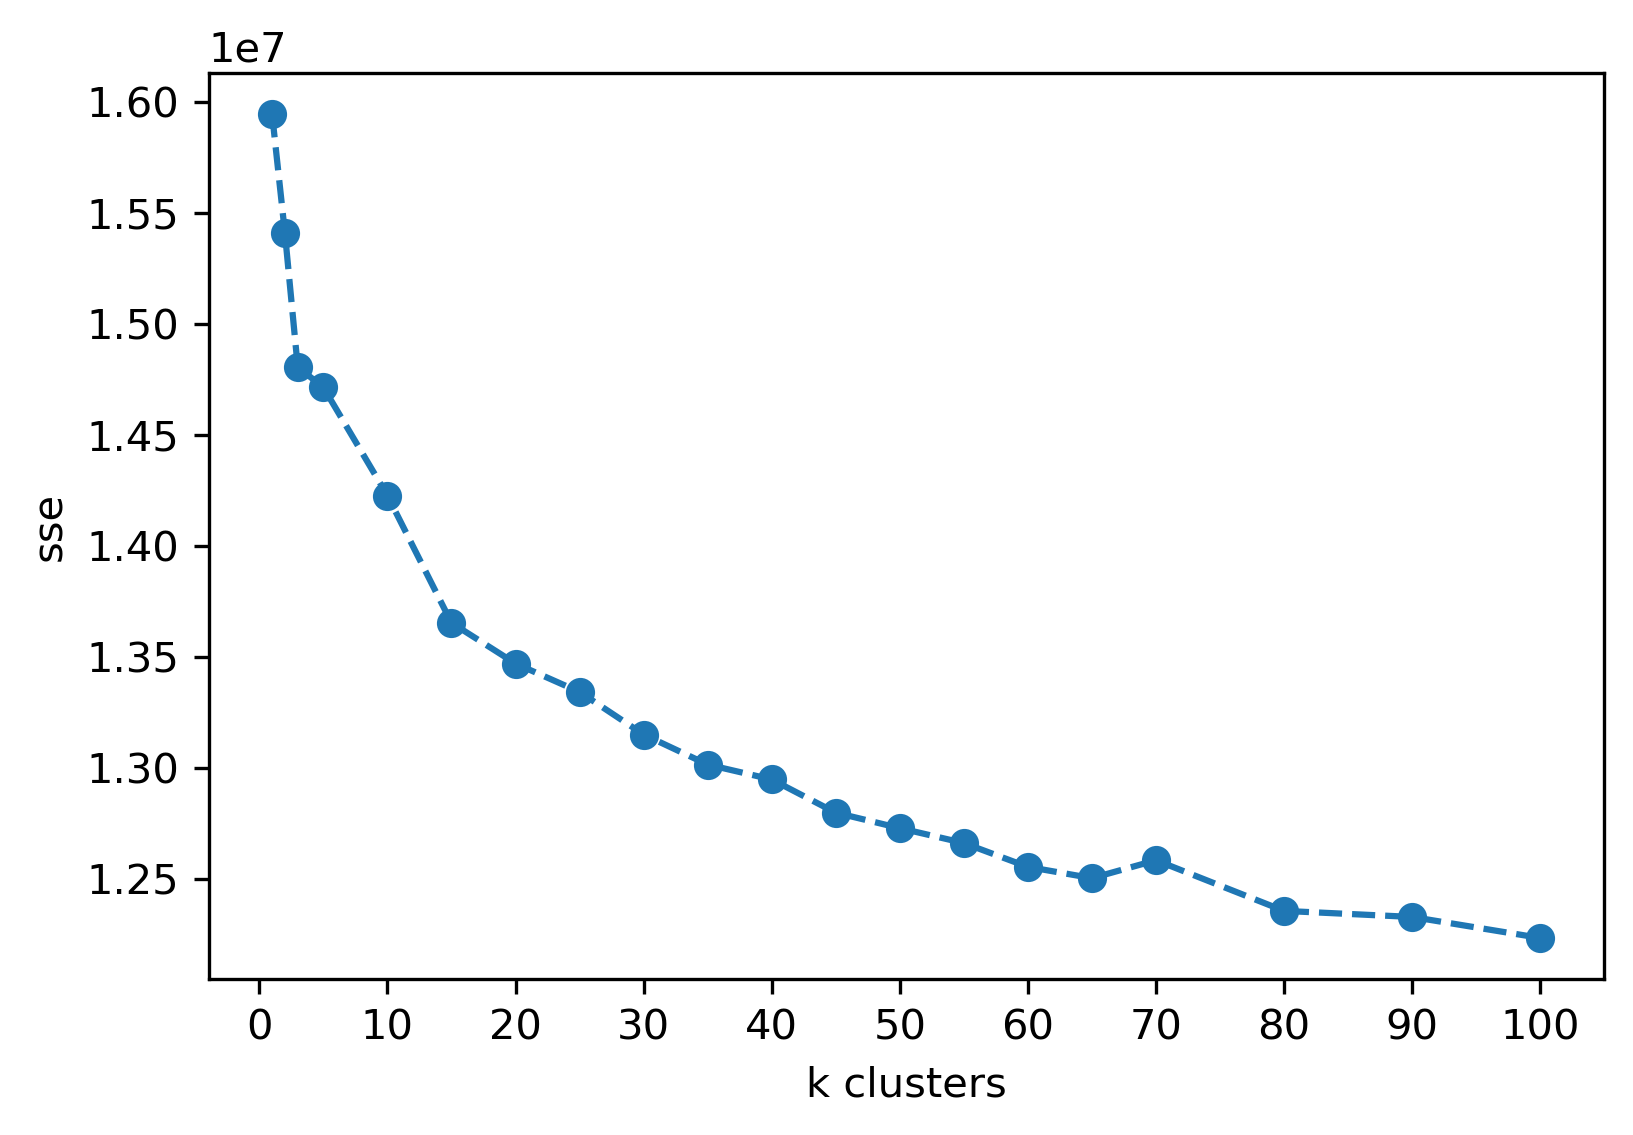

In [37]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from matplotlib import pyplot as plt
c = [1,2,3]
k = c + [i for i in range(5,75,5)] + [80,90,100]
plt.plot(k, sse, '--o')
plt.xticks(np.arange(0,110,10))
plt.xlabel("k clusters")
plt.ylabel("sse")

Text(0, 0.5, 'Count')

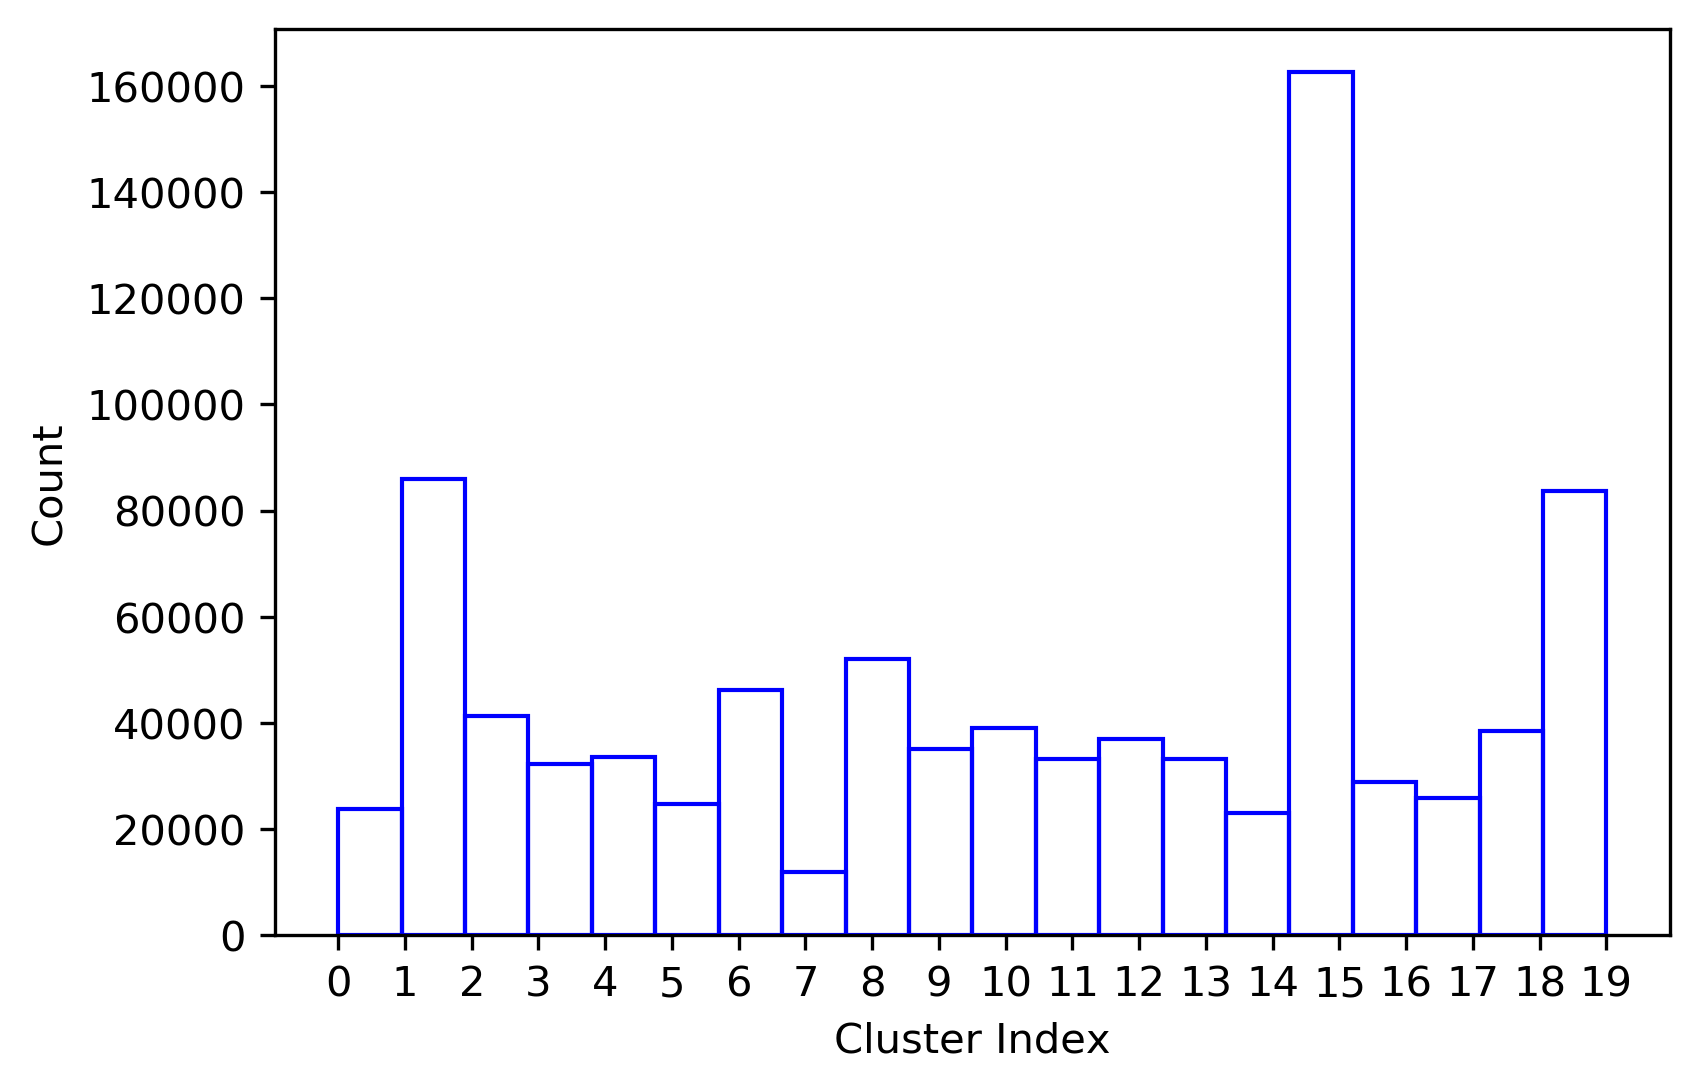

In [45]:
"""
We notice elbows at 5 and 20 clusters
Lets plot the count of data points at these clustes
"""
#labels=['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']
labels = ['cluster'+str(i) for i in range(10)]
plt.hist(kmeans_cluster20.labels_, bins=20, align='mid', edgecolor='b', facecolor="None")
plt.xticks(np.arange(20))
plt.xlabel("Cluster Index")
plt.ylabel("Count")

In [46]:
# Lets dump the best found model from the elbow method; i.e k=5
from joblib import dump, load
dump(kmeans_cluster20, 'model/kmeans_model_k20.joblib') 

['kmeans_model_k20.joblib']

In [92]:
# Lets project customer data on to the clusters
import boto3
s3 = boto3.client('s3')
obj = s3.get_object(Bucket='sagemaker-us-east-2-840691022453', Key='Udacity_CUSTOMERS_052018.csv')
customer_df = pd.read_csv(obj['Body'], sep=';')

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [93]:
customer_df.shape

(191652, 369)

In [11]:
selected_feature.shape

(891221, 269)

In [12]:
customer_df.columns

Index(['LNR', 'AGER_TYP', 'AKT_DAT_KL', 'ALTER_HH', 'ALTER_KIND1',
       'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN',
       'ANZ_HAUSHALTE_AKTIV',
       ...
       'VK_ZG11', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'WOHNLAGE', 'ZABEOTYP',
       'PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'ANREDE_KZ',
       'ALTERSKATEGORIE_GROB'],
      dtype='object', length=369)

In [15]:
selected_feature.columns[1:]

Index(['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'BALLRAUM', 'CJT_GESAMTTYP', 'EWDICHTE', 'FINANZ_ANLEGER',
       'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST',
       ...
       'CAMEO_DEU_2015_7E', 'CAMEO_DEU_2015_8A', 'CAMEO_DEU_2015_8B',
       'CAMEO_DEU_2015_8C', 'CAMEO_DEU_2015_8D', 'CAMEO_DEU_2015_9A',
       'CAMEO_DEU_2015_9B', 'CAMEO_DEU_2015_9C', 'CAMEO_DEU_2015_9D',
       'CAMEO_DEU_2015_9E'],
      dtype='object', length=268)

In [36]:
to_drop = list(set(customer_df.columns) - set(selected_feature.columns))

In [37]:
to_drop.index('CAMEO_DEU_2015'), to_drop.index('CAMEO_DEUG_2015')

(122, 142)

In [38]:
to_drop[122], to_drop[142]

('CAMEO_DEU_2015', 'CAMEO_DEUG_2015')

In [39]:
to_drop.pop(122)

'CAMEO_DEU_2015'

In [40]:
'CAMEO_DEU_2015' in to_drop

False

In [41]:
to_drop.index('CAMEO_DEUG_2015')

141

In [42]:
to_drop.pop(141)

'CAMEO_DEUG_2015'

In [43]:
'CAMEO_DEUG_2015' in to_drop

False

In [94]:
sorted(to_drop)

['AGER_TYP',
 'AKT_DAT_KL',
 'ALTERSKATEGORIE_FEIN',
 'ALTER_HH',
 'ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'ANREDE_KZ',
 'ANZ_KINDER',
 'ANZ_STATISTISCHE_HAUSHALTE',
 'ARBEIT',
 'CAMEO_INTL_2015',
 'CJT_KATALOGNUTZER',
 'CJT_TYP_1',
 'CJT_TYP_2',
 'CJT_TYP_3',
 'CJT_TYP_4',
 'CJT_TYP_5',
 'CJT_TYP_6',
 'CUSTOMER_GROUP',
 'D19_BANKEN_ANZ_12',
 'D19_BANKEN_ANZ_24',
 'D19_BANKEN_DATUM',
 'D19_BANKEN_DIREKT',
 'D19_BANKEN_GROSS',
 'D19_BANKEN_LOKAL',
 'D19_BANKEN_OFFLINE_DATUM',
 'D19_BANKEN_ONLINE_DATUM',
 'D19_BANKEN_ONLINE_QUOTE_12',
 'D19_BANKEN_REST',
 'D19_BEKLEIDUNG_GEH',
 'D19_BEKLEIDUNG_REST',
 'D19_BILDUNG',
 'D19_BIO_OEKO',
 'D19_BUCH_CD',
 'D19_DIGIT_SERV',
 'D19_DROGERIEARTIKEL',
 'D19_ENERGIE',
 'D19_FREIZEIT',
 'D19_GARTEN',
 'D19_GESAMT_ANZ_12',
 'D19_GESAMT_ANZ_24',
 'D19_GESAMT_DATUM',
 'D19_GESAMT_OFFLINE_DATUM',
 'D19_GESAMT_ONLINE_DATUM',
 'D19_GESAMT_ONLINE_QUOTE_12',
 'D19_HANDWERK',
 'D19_HAUS_DEKO',
 'D19_KINDERARTIKEL',
 'D19_KONSUMTYP',
 '

In [95]:
customer_df_dropped = customer_df.drop(to_drop, axis=1)

In [96]:
customer_df_dropped.shape, customer_df.shape

((191652, 217), (191652, 369))

In [97]:
selected_feature.shape

(891221, 269)

In [51]:
#Lets clean customer dataframe before one-hot encoding

In [98]:
CAMEO_DEU_2015_vals = []
for i in range(len(customer_df_dropped['CAMEO_DEU_2015'])):
    v = customer_df_dropped['CAMEO_DEU_2015'][i]
    if v not in CAMEO_DEU_2015_vals:
        CAMEO_DEU_2015_vals.append(v)
print(CAMEO_DEU_2015_vals)

['1A', nan, '5D', '4C', '7B', '3B', '1D', '9E', '2D', '4A', '6B', '9D', '8B', '5C', '9C', '4E', '6C', '8C', '8A', '5B', '9B', '3D', '2A', '3C', '5F', '7A', '1E', '2C', '7C', '5A', '2B', '6D', '7E', '5E', '6E', '3A', '9A', '4B', '1C', '1B', '6A', '8D', '7D', '6F', '4D', 'XX']


In [99]:
#Converting the 'XX' to NaN
customer_df_dropped['CAMEO_DEU_2015'] = np.where((customer_df_dropped['CAMEO_DEU_2015'] == 'XX'), np.nan, customer_df_dropped['CAMEO_DEU_2015'])
customer_df_dropped['CAMEO_DEU_2015'][customer_df_dropped['CAMEO_DEU_2015']=='XX'] # testing if replacement worked

Series([], Name: CAMEO_DEU_2015, dtype: object)

In [100]:
CAMEO_DEUG_2015_vals = []
for i in range(len(customer_df_dropped['CAMEO_DEUG_2015'])):
    v = customer_df_dropped['CAMEO_DEUG_2015'][i]
    try:
        if np.isnan(float(v)):
            continue
        if v not in CAMEO_DEUG_2015_vals:
            CAMEO_DEUG_2015_vals.append(v)
    except ValueError:
        if v not in CAMEO_DEUG_2015_vals:
            CAMEO_DEUG_2015_vals.append(v)
print(CAMEO_DEUG_2015_vals)

[1.0, 5.0, 4.0, 7.0, 3.0, 9.0, 2.0, 6.0, 8.0, '6', '3', '8', '9', '2', '4', '1', '7', '5', 'X']


In [101]:
#converting 'X' to NaN
customer_df_dropped['CAMEO_DEUG_2015'] = np.where((customer_df_dropped['CAMEO_DEUG_2015'] == 'X'), np.nan, customer_df_dropped['CAMEO_DEUG_2015'])

In [102]:
# Fix the categories for CAMEO_DEUG_2015 such as 1 and 1.0 are the same
for i in range(len(customer_df_dropped['CAMEO_DEUG_2015'])):
    try:
        if not np.isnan(customer_df_dropped['CAMEO_DEUG_2015'][i]):
            customer_df_dropped['CAMEO_DEUG_2015'][i] = int(customer_df_dropped['CAMEO_DEUG_2015'][i])
        else:
            customer_df_dropped['CAMEO_DEUG_2015'][i] = np.nan
    except TypeError:
        customer_df_dropped['CAMEO_DEUG_2015'][i] = int(float(str(customer_df_dropped['CAMEO_DEUG_2015'][i])))

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [103]:
CAMEO_DEUG_2015_vals = []
for i in range(len(customer_df_dropped['CAMEO_DEUG_2015'])):
    c = customer_df_dropped['CAMEO_DEUG_2015'][i]
    if c not in CAMEO_DEUG_2015_vals:
        CAMEO_DEUG_2015_vals.append(c)
print(sorted(CAMEO_DEUG_2015_vals))
#print(CAMEO_DEUG_2015_vals[:10])
print(len(CAMEO_DEUG_2015_vals))

[1, nan, 2, 3, 4, 5, 6, 7, 8, 9]
10


In [104]:
# Finding categories of OST_WEST_KZ ('O'/'W' were converted to 0/1 respectively)
OST_WEST_KZ_vals = []
for i in range(len(customer_df_dropped['OST_WEST_KZ'])):
    c = customer_df_dropped['OST_WEST_KZ'][i]
    try:
        if str(int(c)) not in OST_WEST_KZ_vals:
            OST_WEST_KZ_vals.append(str(int(c)))
    except ValueError:
        if str(c) not in OST_WEST_KZ_vals:
            OST_WEST_KZ_vals.append(str(c))
print(sorted(OST_WEST_KZ_vals))
print(len(OST_WEST_KZ_vals))

['O', 'W', 'nan']
3


In [105]:
# Lets binary encode the 'OST_WEST_KZ' column
customer_df_dropped['OST_WEST_KZ'] = np.where((customer_df_dropped['OST_WEST_KZ'] == 'O'), 0, customer_df_dropped['OST_WEST_KZ'])
customer_df_dropped['OST_WEST_KZ'] = np.where((customer_df_dropped['OST_WEST_KZ'] == 'W'), 1, customer_df_dropped['OST_WEST_KZ'])

In [106]:
# Lets one hot encode CAMEO_DEU_2015 and CAMEO_DEUG_2015

In [107]:
# Lets one hot encode CAMEO_DEUG_2015
customer_df_dropped = pd.concat([customer_df_dropped, pd.get_dummies(customer_df_dropped['CAMEO_DEUG_2015'], prefix='CAMEO_DEUG_2015',dummy_na=True)],axis=1).drop(['CAMEO_DEUG_2015'], axis=1)

In [108]:
customer_df_dropped.columns

Index(['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'BALLRAUM', 'CAMEO_DEU_2015', 'CJT_GESAMTTYP', 'EWDICHTE',
       'FINANZ_ANLEGER', 'FINANZ_HAUSBAUER',
       ...
       'CAMEO_DEUG_2015_1.0', 'CAMEO_DEUG_2015_2.0', 'CAMEO_DEUG_2015_3.0',
       'CAMEO_DEUG_2015_4.0', 'CAMEO_DEUG_2015_5.0', 'CAMEO_DEUG_2015_6.0',
       'CAMEO_DEUG_2015_7.0', 'CAMEO_DEUG_2015_8.0', 'CAMEO_DEUG_2015_9.0',
       'CAMEO_DEUG_2015_nan'],
      dtype='object', length=226)

In [109]:
# Lets drop the CAMEO_DEUG_2015_nan column
customer_df_dropped = customer_df_dropped.drop('CAMEO_DEUG_2015_nan', axis=1)

In [110]:
# Lets one-hot encode CAMEO_DEU_2015 column
customer_df_dropped = pd.concat([customer_df_dropped, pd.get_dummies(customer_df_dropped['CAMEO_DEU_2015'], prefix='CAMEO_DEU_2015',dummy_na=True)],axis=1).drop(['CAMEO_DEU_2015'],axis=1)

In [111]:
customer_df_dropped.columns

Index(['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'BALLRAUM', 'CJT_GESAMTTYP', 'EWDICHTE', 'FINANZ_ANLEGER',
       'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST',
       ...
       'CAMEO_DEU_2015_8A', 'CAMEO_DEU_2015_8B', 'CAMEO_DEU_2015_8C',
       'CAMEO_DEU_2015_8D', 'CAMEO_DEU_2015_9A', 'CAMEO_DEU_2015_9B',
       'CAMEO_DEU_2015_9C', 'CAMEO_DEU_2015_9D', 'CAMEO_DEU_2015_9E',
       'CAMEO_DEU_2015_nan'],
      dtype='object', length=269)

In [112]:
# Lets drop the CAMEO_DEU_2015_nan column
customer_df_dropped = customer_df_dropped.drop('CAMEO_DEU_2015_nan', axis=1)

In [113]:
customer_df_dropped.shape

(191652, 268)

In [114]:
customer_df_dropped.columns

Index(['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'BALLRAUM', 'CJT_GESAMTTYP', 'EWDICHTE', 'FINANZ_ANLEGER',
       'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST',
       ...
       'CAMEO_DEU_2015_7E', 'CAMEO_DEU_2015_8A', 'CAMEO_DEU_2015_8B',
       'CAMEO_DEU_2015_8C', 'CAMEO_DEU_2015_8D', 'CAMEO_DEU_2015_9A',
       'CAMEO_DEU_2015_9B', 'CAMEO_DEU_2015_9C', 'CAMEO_DEU_2015_9D',
       'CAMEO_DEU_2015_9E'],
      dtype='object', length=268)

In [115]:
# Imputing using the most frequent value in the column
customer_df_dropped = customer_df_dropped.fillna(customer_df_dropped.mode().iloc[0])

In [116]:
customer_df_dropped.head(n=10)

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,1.0,0.0,2.0,0.0,3.0,5.0,2.0,1,2,5,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,3.0,0.0,6.0,6.0,5.0,1,2,5,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1.0,0.0,7.0,2.0,4.0,1,4,5,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,7.0,2.0,1.0,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,7.0,0.0,4.0,0.0,3.0,6.0,4.0,4,2,3,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0.0,2.0,0.0,7.0,4.0,5.0,1,3,5,...,0,0,0,0,0,0,0,0,0,0
6,1.0,0.0,2.0,0.0,6.0,2.0,2.0,1,2,5,...,0,0,0,0,0,0,0,0,0,0
7,1.0,0.0,2.0,0.0,5.0,2.0,3.0,1,2,5,...,0,0,0,0,0,0,0,0,0,0
8,74.0,2.0,1.0,0.0,3.0,1.0,6.0,1,5,2,...,0,0,0,0,0,0,0,0,0,1
9,1.0,0.0,3.0,0.0,2.0,3.0,5.0,1,1,5,...,0,0,0,0,0,0,0,0,0,0


In [117]:
#Lets scale this data using the minmax scalet of sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [118]:
customer_df_dropped[customer_df_dropped.columns] = scaler.fit_transform(customer_df_dropped)

In [119]:
# df after scaling
customer_df_dropped.head(n=10)

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,0.001912,0.000000,0.095238,0.0,0.333333,0.8,0.2,0.00,0.25,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001912,0.000000,0.142857,0.0,0.833333,1.0,0.8,0.00,0.25,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001912,0.000000,0.047619,0.0,1.000000,0.2,0.6,0.00,0.75,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,1.000000,0.2,0.0,0.25,0.25,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.013384,0.000000,0.190476,0.0,0.333333,1.0,0.6,0.75,0.25,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.001912,0.000000,0.095238,0.0,1.000000,0.6,0.8,0.00,0.50,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.001912,0.000000,0.095238,0.0,0.833333,0.2,0.2,0.00,0.25,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.001912,0.000000,0.095238,0.0,0.666667,0.2,0.4,0.00,0.25,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.141491,0.086957,0.047619,0.0,0.333333,0.0,1.0,0.00,1.00,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.001912,0.000000,0.142857,0.0,0.166667,0.4,0.8,0.00,0.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
# saving the transformed customer dataframe having same dimension as the population (Azdias) dataset
customer_df_dropped.to_csv('data/customer_df_scaled.csv')

In [121]:
# The best fit model we found using kmeans was k=20; lets use that model to predict the labels for customer dataframe

In [132]:
customers_labels = kmeans_cluster20.predict(customer_df_dropped)

In [138]:
pickle.dump(customers_labels, open('data/customers_label.p', 'wb'))

In [52]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from matplotlib import pyplot as plt

Text(0, 0.5, 'Count')

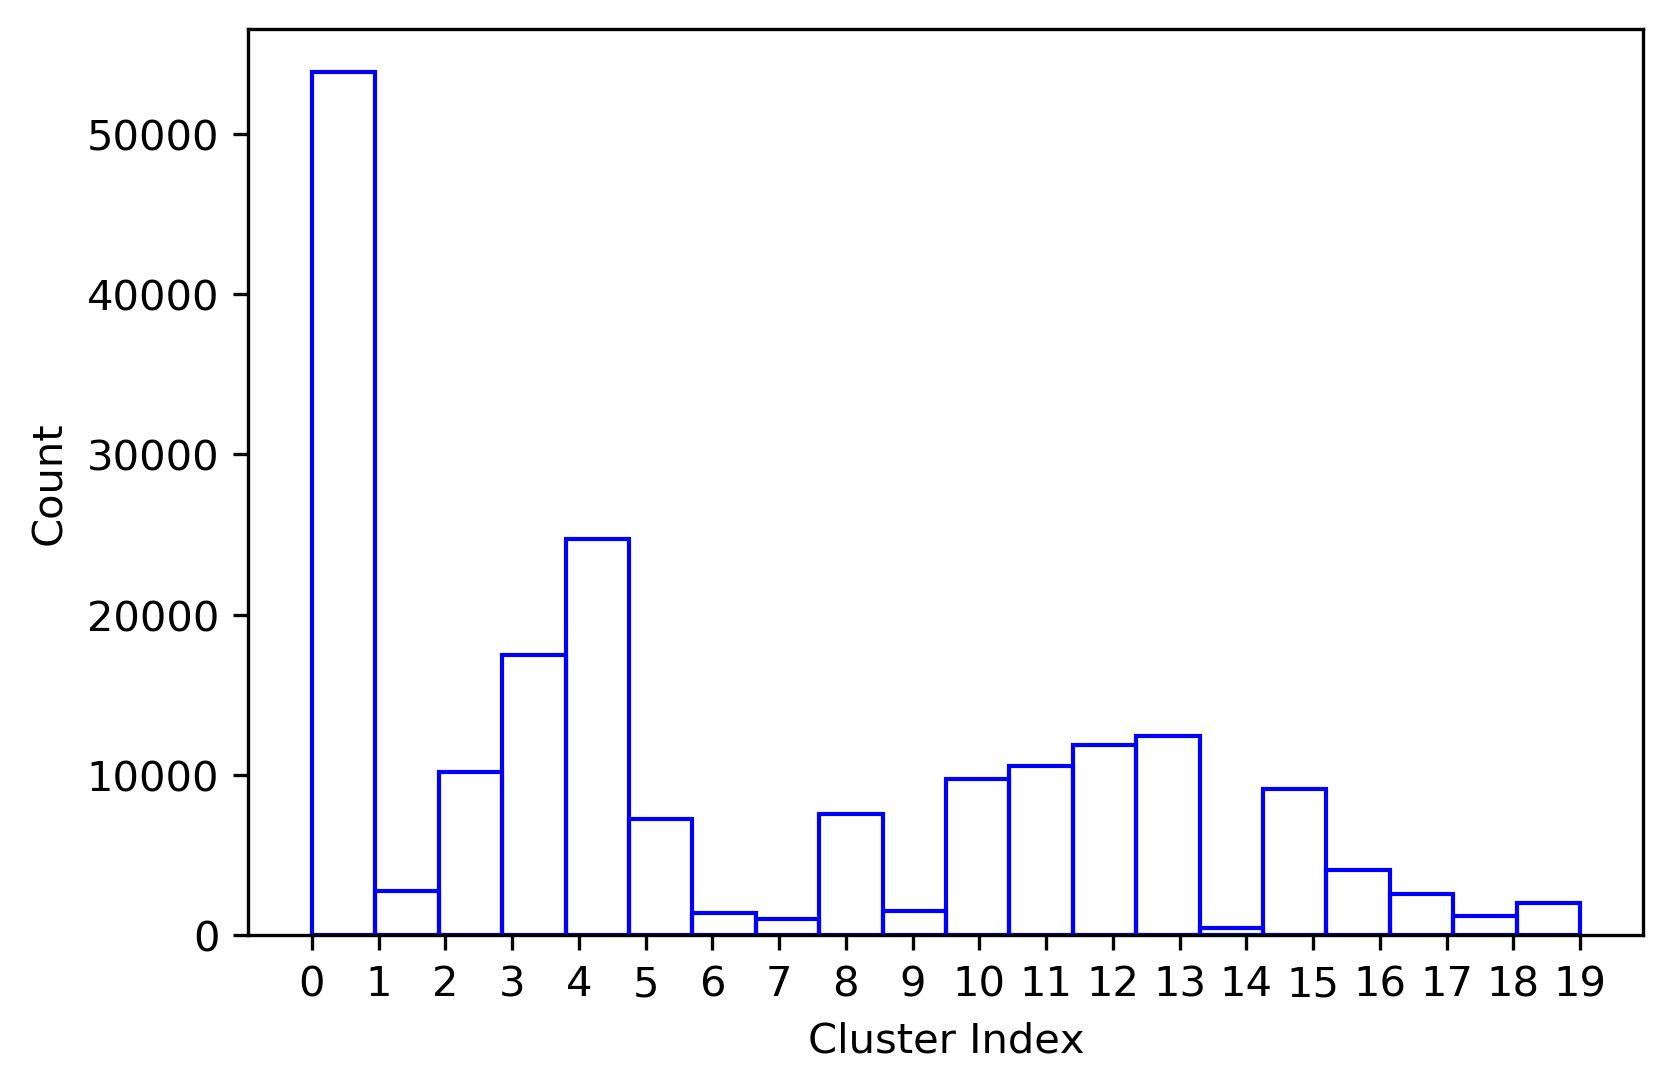

In [135]:
# Lets see how the customers are spread in the population
labels = ['cluster'+str(i) for i in range(10)]
plt.hist(customers_labels, bins=20, align='mid', edgecolor='b', facecolor="None")
plt.xticks(np.arange(20))
plt.xlabel("Cluster Index")
plt.ylabel("Count")

In [ ]:
# Clearly some clusters are heavily populated compared to others. Lets try to find characteristics of the mostly densly populated cluster and the least densely populated cluster

In [5]:
# re-loading since restarted
customer_label = pickle.load(open('data/customers_label.p', 'rb'))

In [5]:
len(customer_label)

191652

In [6]:
# Checking the first 10 labels
customer_label[:10]

array([ 2,  4,  0,  8,  0,  3,  4, 12, 16,  3], dtype=int32)

In [17]:
# selecting indices of the data falling on cluster 0
cluster0_data = [i for i in range(len(customer_label)) if customer_label[i]==0]

In [18]:
len(cluster0_data)

53848

In [12]:
# selecting indices of the data falling on cluster 4
cluster4_data = [i for i in range(len(customer_label)) if customer_label[i]==4]

In [13]:
len(cluster4_data)

24720

In [20]:
# selecting indices of the data falling on sparce cluster 7
cluster7_data = [i for i in range(len(customer_label)) if customer_label[i]==7]

In [21]:
len(cluster7_data)

991

In [7]:
# selecting indices of the data falling on sparce cluster 14
cluster14_data = [i for i in range(len(customer_label)) if customer_label[i]==14]

In [8]:
len(cluster14_data)

417

In [4]:
# lets read the original customer data again
#customer_df_scaled = None
import boto3
s3 = boto3.client('s3')
obj = s3.get_object(Bucket='sagemaker-us-east-2-840691022453', Key='Udacity_CUSTOMERS_052018.csv')
customer_df = pd.read_csv(obj['Body'], sep=';')

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
# pulling customers on cluster 0
customer_df_cluster0 = customer_df.iloc[cluster0_data]

In [20]:
customer_df_cluster0.head(n=10)

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3
36,125534,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,FOOD,MULTI_BUYER,0,2,1
37,125535,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,FOOD,SINGLE_BUYER,0,2,3
38,125536,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,COSMETIC,SINGLE_BUYER,0,2,2
39,125537,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,COSMETIC,SINGLE_BUYER,0,1,1
40,125539,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,COSMETIC,SINGLE_BUYER,1,1,3
43,125549,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,1
44,125559,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,FOOD,SINGLE_BUYER,0,2,1
46,125563,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,COSMETIC,SINGLE_BUYER,0,1,1


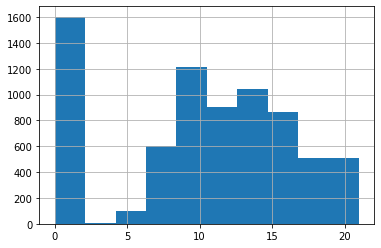

In [51]:
customer_df_cluster0['ALTER_HH'].hist()

In [54]:
customer_df_cluster0.where(customer_df_cluster0['ALTER_HH'] > 0)

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
2,143872.0,-1.0,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3.0,COSMETIC_AND_FOOD,MULTI_BUYER,0.0,2.0,4.0
4,143874.0,-1.0,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1.0,FOOD,MULTI_BUYER,0.0,1.0,3.0
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191591,161656.0,2.0,1.0,10.0,NaN,NaN,NaN,NaN,9.0,7.0,...,5.0,6.0,9.0,4.0,3.0,COSMETIC_AND_FOOD,MULTI_BUYER,0.0,1.0,4.0
191607,59961.0,-1.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0,...,3.0,6.0,9.0,4.0,3.0,COSMETIC_AND_FOOD,MULTI_BUYER,0.0,2.0,4.0
191626,153440.0,-1.0,1.0,14.0,NaN,NaN,NaN,NaN,14.0,7.0,...,7.0,4.0,4.0,2.0,4.0,COSMETIC_AND_FOOD,MULTI_BUYER,0.0,1.0,2.0


In [59]:
# summary stats of the age column; discarding the unknowns
customer_df_cluster0[customer_df_cluster0['ALTER_HH'] > 0]['ALTER_HH'].describe()

count    5749.000000
mean       12.818751
std         3.767031
min         2.000000
25%        10.000000
50%        13.000000
75%        15.000000
max        21.000000
Name: ALTER_HH, dtype: float64

In [60]:
# the mean and the median age group is very close pointing to the age around 1955-1959. At 2018 they would be around 63 yo age. 
# Almost 50%  are of very young age most likely in the workforce earning.

In [68]:
# lets look at the class they belong to
customer_df_cluster0.drop(customer_df_cluster0[customer_df_cluster0['CAMEO_DEUG_2015'] =='X'].index, inplace = True) 

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
vals=[]
for v in customer_df_cluster0['CAMEO_DEUG_2015']:
    try:
        if v == -1:
            continue
        vals.append(int(v))
    except ValueError:
        continue

(array([ 240.,  280.,  584.,  539.,    0.,  616., 1800., 1045., 1081.,
         632.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

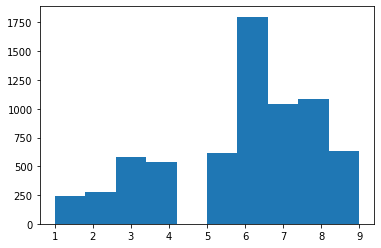

In [79]:
from matplotlib import pyplot as plt
plt.hist(vals)

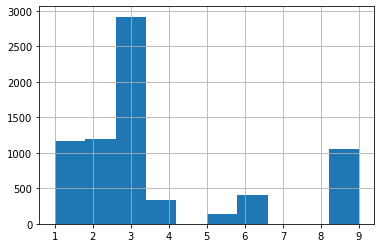

In [87]:
# looking at the consumption pattern
customer_df_cluster0['D19_KONSUMTYP'].hist() # majority are of gourmet type

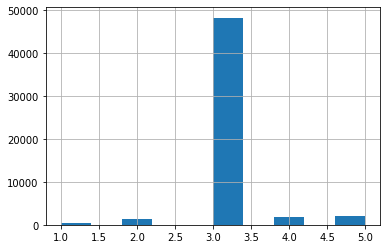

In [89]:
# These customers have average interest to own house
customer_df_cluster0['FINANZ_HAUSBAUER'].hist()

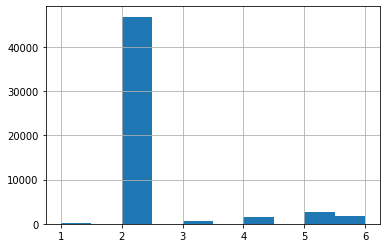

In [95]:
# very high income category
customer_df_cluster0['HH_EINKOMMEN_SCORE'].hist()

In [10]:
# pulling customers on cluster 14
customer_df_cluster14 = customer_df.iloc[cluster14_data]

In [11]:
customer_df_cluster14.shape

(417, 369)

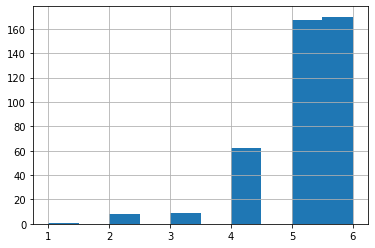

In [98]:
# very low income category
customer_df_cluster14['HH_EINKOMMEN_SCORE'].hist()

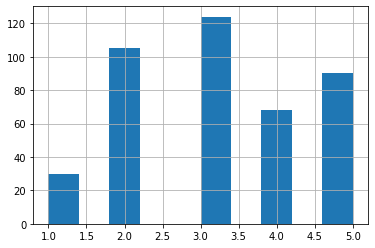

In [12]:
# These customers have average interest to own house
customer_df_cluster14['FINANZ_HAUSBAUER'].hist()

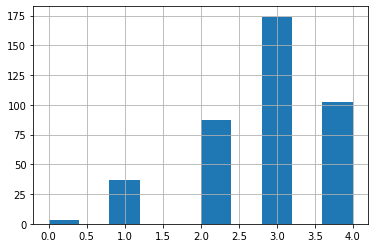

In [31]:
customer_df_cluster14['KKK'].hist()

In [33]:
customer_df_cluster14['KKK'].describe()

count    403.000000
mean       2.831266
std        0.936446
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: KKK, dtype: float64

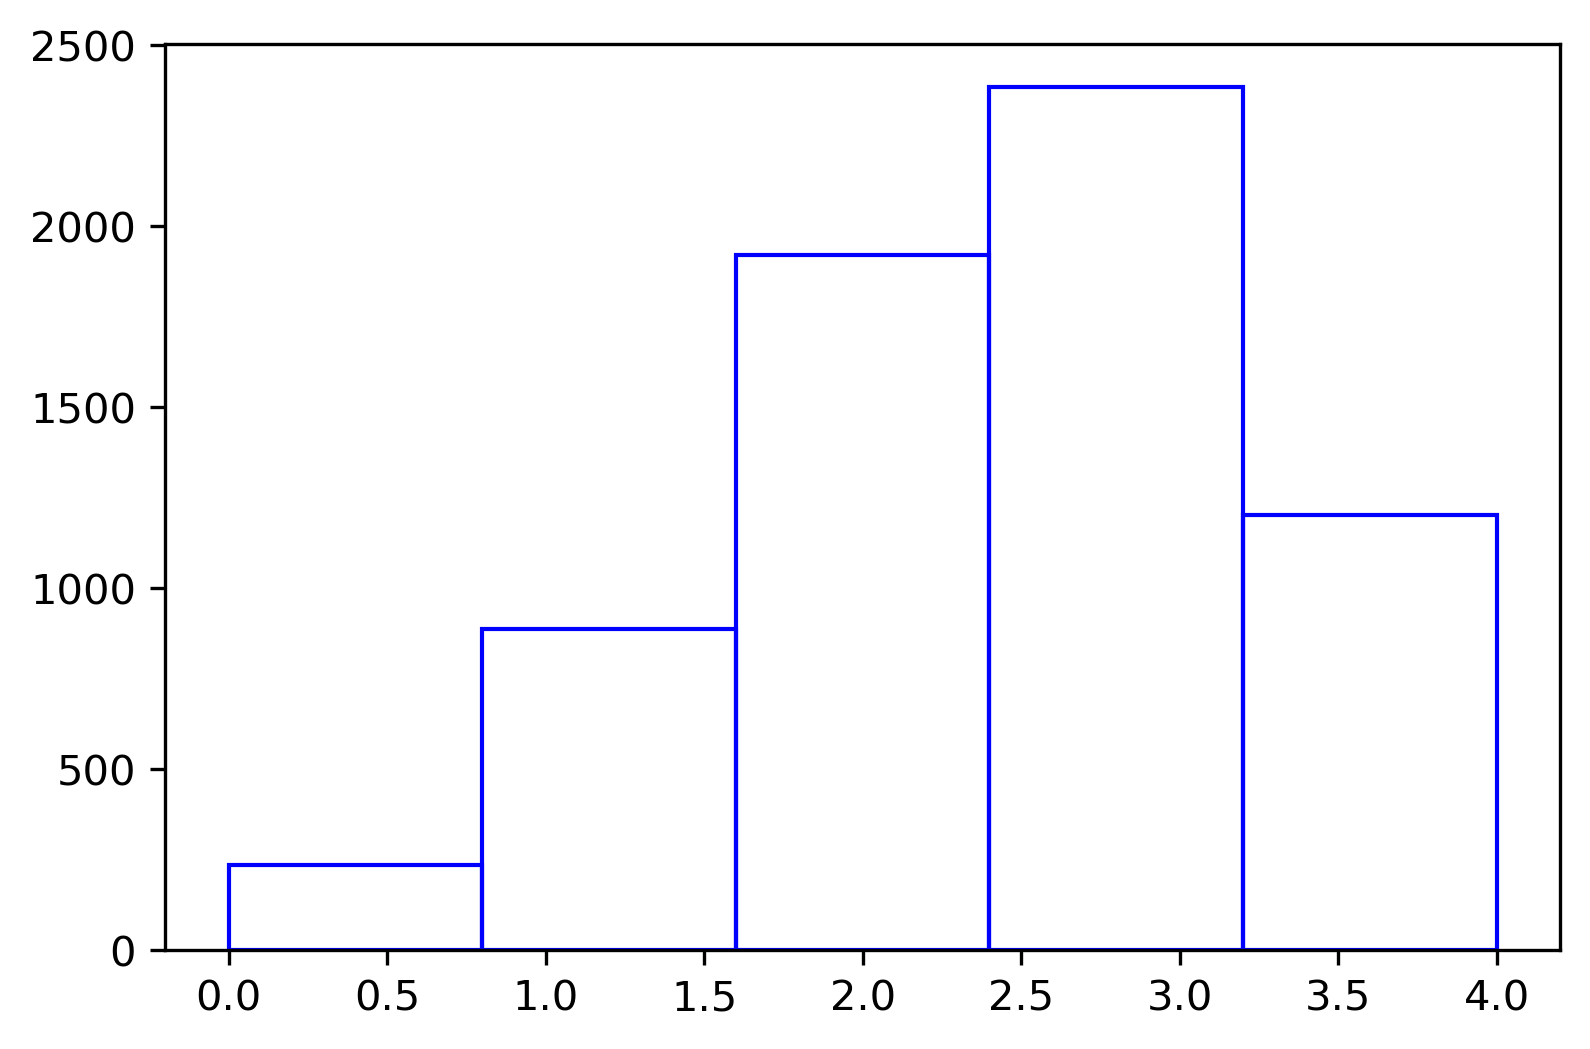

In [58]:
res0 = plt.hist(customer_df_cluster0['KKK'], bins=5, facecolor='none', edgecolor='b')

count    6624.000000
mean        2.517814
std         1.045102
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: KKK, dtype: float64

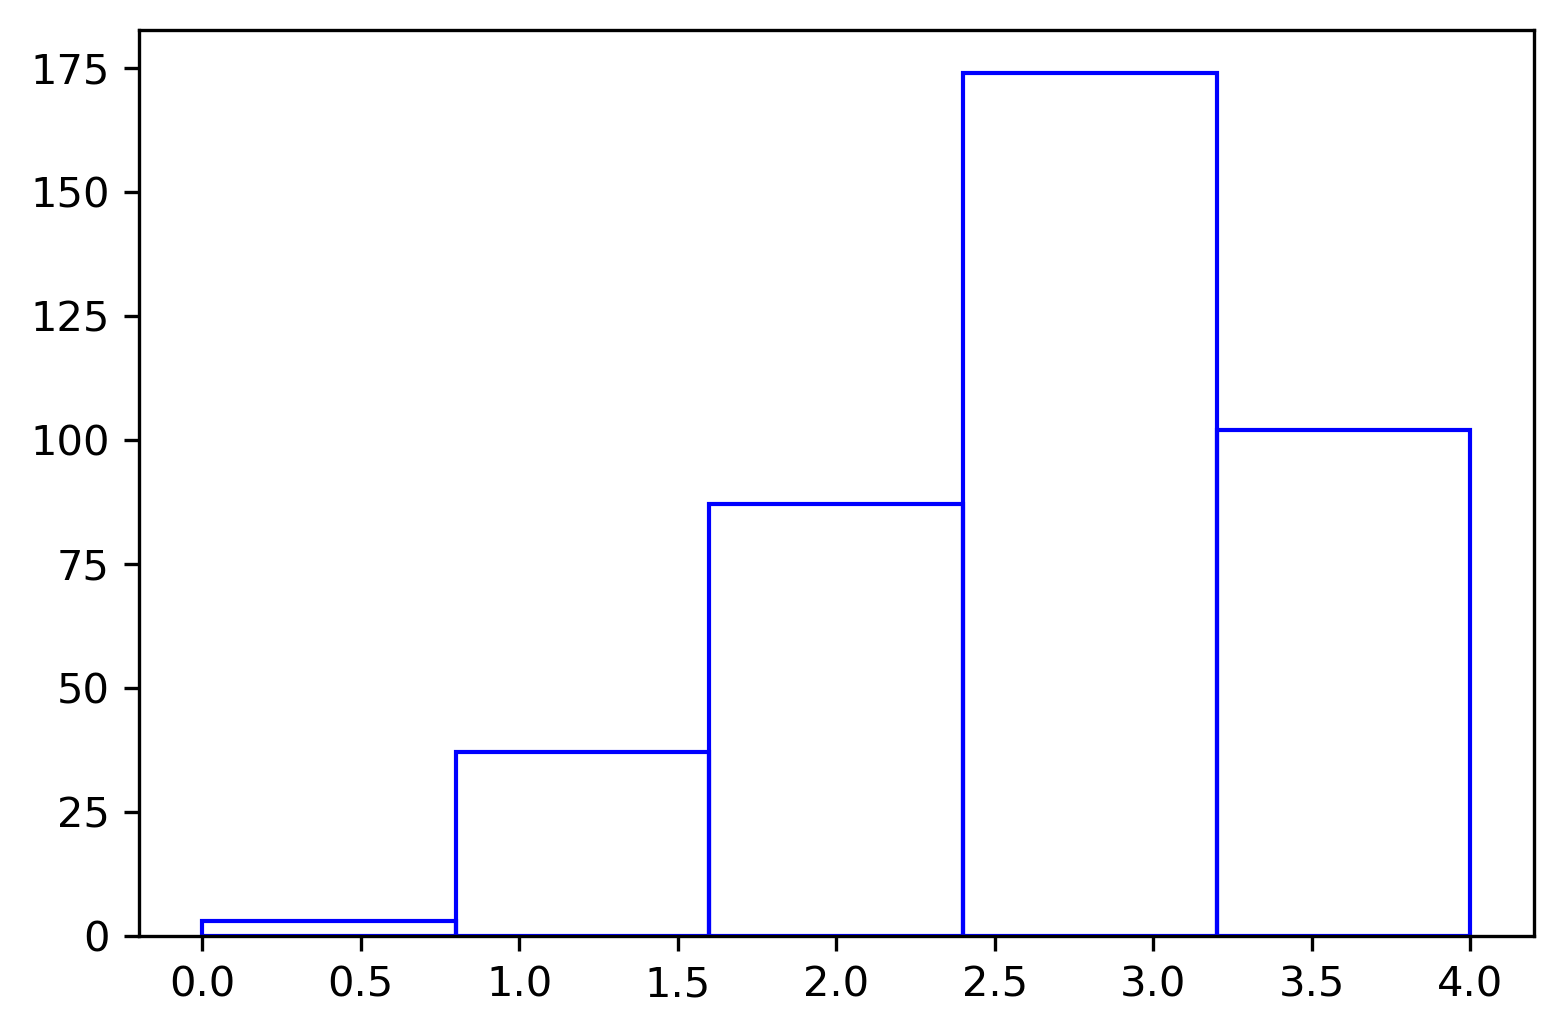

In [59]:
res14 = plt.hist(customer_df_cluster14['KKK'], bins=5, facecolor='none', edgecolor='b')

In [61]:
np.sum(res14[0][:4])/np.sum(res14[0])

0.7468982630272953

In [62]:
res0

(array([ 234.,  887., 1919., 2383., 1201.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

In [63]:
np.sum(res0[0][:4])/np.sum(res0[0])

0.8186896135265701

In [1]:
# In cluster0, ~82% customers have higher purchasing power. Around 75% of the customers in cluster14 have high purchasing power. 
# Suggeting that customers in cluster0 has higher purchasing power than customers at cluster14. 